## News Article Classification (Fake/Real)
# Objective: Classify news articles as fake or real using NLP.
# Tools: Python, Sklearn, Pandas, NLTK
# Mini-Guide:
Collect labeled dataset from Kaggle
Clean text using NLTK
Vectorize with TF-IDF
Train Logistic Regression/Naive Bayes model
Evaluate metrics (F1, accuracy)
Create Streamlit interface for input
Display prediction & explanation
# Deliverables: Jupyter notebook, trained model, live web demo

In [1]:
import pandas as pd
import numpy as np # Import numpy for shuffling

print("--- Project 6: Step 1 (Revised) - Load and Combine Dataset ---")

# Define the paths to your dataset files
fake_news_file = 'Fake.csv'
true_news_file = 'True.csv'

try:
    # Load the fake news dataset
    print(f"Loading fake news dataset: {fake_news_file}...")
    df_fake = pd.read_csv(fake_news_file)
    df_fake['label'] = 0 # Assign label 0 for fake news
    print(f"Dataset '{fake_news_file}' loaded. Assigned label '0'.")

    # Load the true news dataset
    print(f"Loading true news dataset: {true_news_file}...")
    df_true = pd.read_csv(true_news_file)
    df_true['label'] = 1 # Assign label 1 for true news
    print(f"Dataset '{true_news_file}' loaded. Assigned label '1'.")

    # Combine the two datasets
    print("\nCombining fake and true news datasets...")
    df_news = pd.concat([df_fake, df_true]).reset_index(drop=True)
    print("Datasets combined successfully.")

    # Shuffle the combined dataset to mix fake and true articles
    print("Shuffling the combined dataset...")
    df_news = df_news.sample(frac=1, random_state=42).reset_index(drop=True)
    print("Dataset shuffled.")

    # Display basic information about the combined dataset
    print("\nCombined Dataset Info:")
    df_news.info()

    # Display the first few rows of the combined dataset
    print("\nFirst 5 rows of the combined dataset (after shuffling):")
    print(df_news.head())

    # Check for missing values in the combined dataset
    print("\nMissing values in each column of the combined dataset:")
    print(df_news.isnull().sum())

    # Check the distribution of the target variable ('label')
    print("\nDistribution of 'label' (0: Fake, 1: True):")
    print(df_news['label'].value_counts())
    print(f"Total entries: {len(df_news)}")


except FileNotFoundError:
    print(f"Error: One or both files ('{fake_news_file}', '{true_news_file}') were not found.")
    print("Please make sure you have downloaded both datasets from Kaggle and placed them in the same directory as your notebook.")
except Exception as e:
    print(f"An error occurred while loading or inspecting the dataset: {e}")

print("\nProject 6: Step 1 (Load and Combine Dataset) complete.")
print("Please review the output to ensure the data loaded correctly and is combined as expected.")

--- Project 6: Step 1 (Revised) - Load and Combine Dataset ---
Loading fake news dataset: Fake.csv...
Dataset 'Fake.csv' loaded. Assigned label '0'.
Loading true news dataset: True.csv...
Dataset 'True.csv' loaded. Assigned label '1'.

Combining fake and true news datasets...
Datasets combined successfully.
Shuffling the combined dataset...
Dataset shuffled.

Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB

First 5 rows of the combined dataset (after shuffling):
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon f

## Observations

* **Dataset Loading and Combination:** Both `Fake.csv` and `True.csv` were successfully loaded. A new `label` column was added to each, with `0` for fake news and `1` for true news. These two datasets were then correctly concatenated into a single DataFrame named `df_news`.
* **Data Structure:** The combined dataset contains `44,898` entries and 5 columns: `title`, `text`, `subject`, `date`, and the newly created `label`. The `title` and `text` columns will be the primary features for classification, while `subject` and `date` might be useful for further analysis or feature engineering.
* **Data Shuffling:** The combined dataset was successfully shuffled (`df.sample(frac=1)`). This is a crucial step to ensure that the fake and true news articles are interleaved, preventing any bias during training and testing, especially if the original files were sorted by label.
* **Missing Values:** A check for missing values confirmed that there are no null entries in any of the columns, which means the dataset is clean and doesn't require imputation for this project.
* **Label Distribution:** The distribution of the `label` column shows that there are `23,481` fake news articles (label 0) and `21,417` true news articles (label 1). This indicates a relatively balanced dataset, which is good for training a classification model as it reduces the need for advanced techniques to handle class imbalance.

Overall, the data is well-prepared and ready for the next steps in our fake news classification project.

In [11]:
import nltk

print("--- Downloading all necessary NLTK packages ---")
nltk.download('stopwords') # For stop words removal
nltk.download('punkt')     # For tokenization (used implicitly by some NLTK functions)
nltk.download('wordnet')   # For WordNet (used by Lemmatizer, good to have)
nltk.download('averaged_perceptron_tagger') # Often needed for WordNetLemmatizer POS tagging
nltk.download('porter')    # Specifically for PorterStemmer

print("\nNLTK downloads complete. Please review the output to ensure no errors occurred.")

--- Downloading all necessary NLTK packages ---


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91961\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91961\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91961\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91961\AppData\Roaming\nltk_data...



NLTK downloads complete. Please review the output to ensure no errors occurred.


[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Error loading porter: Package 'porter' not found in index


## Clean Text using NLTK

In [13]:
import pandas as pd
import numpy as np
import re # For regular expressions
import nltk
from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer # Commented out as 'porter' package download has issues

print("--- Project 6: Step 2 (Revised) - Clean Text using NLTK ---")

# Re-define necessary variables from Step 1 for self-containment
# (Assuming Fake.csv and True.csv are in the same directory)
fake_news_file = 'Fake.csv'
true_news_file = 'True.csv'

df_fake = pd.read_csv(fake_news_file)
df_fake['label'] = 0
df_true = pd.read_csv(true_news_file)
df_true['label'] = 1
df_news = pd.concat([df_fake, df_true]).reset_index(drop=True)
df_news = df_news.sample(frac=1, random_state=42).reset_index(drop=True)


# Combine 'title' and 'text' columns into a new 'full_text' column for processing
print("\nCombining 'title' and 'text' columns into 'full_text'...")
df_news['full_text'] = df_news['title'] + " " + df_news['text']
print("'full_text' column created.")

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Define a text cleaning function (without stemming)
def clean_text(text):
    text = str(text).lower() # Convert to lowercase and ensure string type
    text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(r'<.*?>+', '', text) # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text) # Remove punctuation
    text = re.sub(r'\n', '', text) # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers
    text = ' '.join([word for word in text.split(' ') if word not in stop_words]) # Remove stop words
    # Stemming line removed due to NLTK 'porter' package download issues.
    # text = ' '.join([stemmer.stem(word) for word in text.split(' ')])
    return text

print("\nApplying text cleaning to the 'full_text' column (without stemming). This may take a moment...")
# Apply the cleaning function to the 'full_text' column
df_news['cleaned_text'] = df_news['full_text'].apply(clean_text)
print("Text cleaning complete. 'cleaned_text' column created.")

# Display cleaned text samples
print("\nOriginal Full Text (first 200 chars) vs. Cleaned Text (first 200 chars) Samples:")
for i in range(5):
    print(f"\n--- Sample {i+1} ---")
    print("Original Full Text (first 200 chars):")
    print(df_news['full_text'].iloc[i][:200])
    print("Cleaned Text (first 200 chars):")
    print(df_news['cleaned_text'].iloc[i][:200])

print("\nProject 6: Step 2 (Clean Text using NLTK) complete.")
print("The 'cleaned_text' column is now ready for vectorization.")

--- Project 6: Step 2 (Revised) - Clean Text using NLTK ---

Combining 'title' and 'text' columns into 'full_text'...
'full_text' column created.

Applying text cleaning to the 'full_text' column (without stemming). This may take a moment...
Text cleaning complete. 'cleaned_text' column created.

Original Full Text (first 200 chars) vs. Cleaned Text (first 200 chars) Samples:

--- Sample 1 ---
Original Full Text (first 200 chars):
Ben Stein Calls Out 9th Circuit Court: Committed a ‘Coup d’état’ Against the Constitution 21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame
Cleaned Text (first 200 chars):
ben stein calls  circuit court committed ‘coup d’état’ constitution  century wire says ben stein reputable professor pepperdine university also hollywood fame appearing tv shows films ferris bueller d

--- Sample 2 ---
Original Full Text (first 200 chars):
Trump drops Steve Bannon from National Security Council WASHINGTON (Reuters

## Observations

* **Text Combination:** The `title` and `text` columns were successfully combined into a new `full_text` column. This is a good approach as both provide relevant information for classifying a news article.
* **Text Preprocessing:** A comprehensive text cleaning function was applied to the `full_text` column, creating a new `cleaned_text` column. The cleaning steps included:
    * Converting all text to **lowercase**.
    * Removing text within **square brackets**, **URLs**, and **HTML tags**.
    * Eliminating **punctuation** and **newline characters**.
    * Removing **words containing numbers**.
    * Removing common **English stop words** (e.g., "the", "a", "is"), which often carry little semantic meaning for classification.
* **Stemming Exclusion:** Due to the NLTK package download issues encountered, the stemming step (using `PorterStemmer`) was intentionally omitted. While stemming can sometimes help reduce vocabulary size and normalize words, its exclusion is acceptable for this project, especially given the goal of ease and explainability, and will not significantly hinder the model's performance.
* **Sample Inspection:** The provided samples clearly demonstrate the effect of the cleaning process. Original text, which included varying capitalization, punctuation, and stop words, has been transformed into a more uniform and concise format in the `cleaned_text` column, making it suitable for numerical representation.
* **Readiness for Vectorization:** The `cleaned_text` column is now in a preprocessed state, ready to be converted into numerical features that machine learning models can understand.

This step is crucial as it reduces noise in the data and helps the model focus on the most important words for classification.

##  Vectorize with TF-IDF

In [15]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

print("--- Project 6: Step 3 - Vectorize with TF-IDF ---")

# Re-define necessary variables from Step 1 and 2 for self-containment
fake_news_file = 'Fake.csv'
true_news_file = 'True.csv'

df_fake = pd.read_csv(fake_news_file)
df_fake['label'] = 0
df_true = pd.read_csv(true_news_file)
df_true['label'] = 1
df_news = pd.concat([df_fake, df_true]).reset_index(drop=True)
df_news = df_news.sample(frac=1, random_state=42).reset_index(drop=True)

df_news['full_text'] = df_news['title'] + " " + df_news['text']

stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

df_news['cleaned_text'] = df_news['full_text'].apply(clean_text)


# --- TF-IDF Vectorization ---
# Initialize TfidfVectorizer
# max_features: build a vocabulary that only considers the top max_features ordered by term frequency across the corpus.
# min_df: ignore terms that have a document frequency strictly lower than the given threshold.
print("\nInitializing TF-IDF Vectorizer...")
tfidf_vectorizer = TfidfVectorizer(max_features=10000, min_df=5) # Example: limit to 10000 features, ignore words appearing in < 5 documents

# Fit and transform the 'cleaned_text' column
print("Fitting TF-IDF Vectorizer and transforming text data...")
X_tfidf = tfidf_vectorizer.fit_transform(df_news['cleaned_text'])
print("TF-IDF Vectorization complete.")

# X_tfidf is a sparse matrix, which is memory efficient for text data.
print(f"\nShape of TF-IDF features (samples, features): {X_tfidf.shape}")

# Get the target variable (labels)
y = df_news['label']
print(f"Shape of target variable (labels): {y.shape}")

print("\nProject 6: Step 3 (Vectorize with TF-IDF) complete.")
print("The text data has been converted into numerical TF-IDF features (X_tfidf) and labels (y) are ready.")

--- Project 6: Step 3 - Vectorize with TF-IDF ---

Initializing TF-IDF Vectorizer...
Fitting TF-IDF Vectorizer and transforming text data...
TF-IDF Vectorization complete.

Shape of TF-IDF features (samples, features): (44898, 10000)
Shape of target variable (labels): (44898,)

Project 6: Step 3 (Vectorize with TF-IDF) complete.
The text data has been converted into numerical TF-IDF features (X_tfidf) and labels (y) are ready.


## Observations

* **Purpose of TF-IDF:** Text data cannot be directly fed into machine learning models. TF-IDF (Term Frequency-Inverse Document Frequency) is a powerful statistical method used to convert text into numerical feature vectors. It quantifies how relevant a word is in a document relative to a collection of documents (corpus). Words that are unique to a specific document but rare across the entire corpus get higher TF-IDF scores, making them good indicators for classification.
* **Vectorization Process:**
    * A `TfidfVectorizer` was initialized. The `max_features=10000` parameter means that only the 10,000 most frequently occurring and relevant words (after filtering by `min_df`) in the `cleaned_text` column were considered to form the vocabulary.
    * The `min_df=5` parameter ensures that words appearing in fewer than 5 documents are ignored, which helps in filtering out very rare words that might not contribute much to classification and could increase noise.
    * The vectorizer was then `fit_transform`ed on the `cleaned_text` data, converting it into a sparse matrix `X_tfidf`.
* **Output Dimensions:**
    * The shape of the TF-IDF features, `X_tfidf`, is `(44898, 10000)`. This means we have 44,898 samples (news articles) and each article is now represented by 10,000 numerical features, where each feature corresponds to a specific word's TF-IDF score.
    * The shape of the target variable, `y`, is `(44898,)`, which contains the `label` (0 for fake, 1 for true) for each of the 44,898 news articles.
* **Readiness for Modeling:** The `X_tfidf` (features) and `y` (labels) are now in the correct numerical format, ready to be split into training and testing sets and then used to train a machine learning classification model.

##  Train Logistic Regression Model

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split # Import for splitting data
from sklearn.linear_model import LogisticRegression # Import Logistic Regression

print("--- Project 6: Step 4 - Train Logistic Regression Model ---")

# Re-define necessary variables from previous steps for self-containment
# (Assuming Fake.csv and True.csv are in the same directory)
fake_news_file = 'Fake.csv'
true_news_file = 'True.csv'

df_fake = pd.read_csv(fake_news_file)
df_fake['label'] = 0
df_true = pd.read_csv(true_news_file)
df_true['label'] = 1
df_news = pd.concat([df_fake, df_true]).reset_index(drop=True)
df_news = df_news.sample(frac=1, random_state=42).reset_index(drop=True)

df_news['full_text'] = df_news['title'] + " " + df_news['text']

stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

df_news['cleaned_text'] = df_news['full_text'].apply(clean_text)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, min_df=5)
X_tfidf = tfidf_vectorizer.fit_transform(df_news['cleaned_text'])
y = df_news['label']


# --- Data Splitting ---
print("\nSplitting data into training and testing sets (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# --- Model Training (Logistic Regression) ---
print("\nInitializing and training Logistic Regression model...")
logistic_model = LogisticRegression(max_iter=1000, random_state=42) # Increased max_iter for convergence
logistic_model.fit(X_train, y_train)
print("Logistic Regression model training complete.")

# Global variables for next step (evaluation)
# Make X_test, y_test, and logistic_model available for the next step.
# In a real script, you might pass these or save them. For notebook flow, global is okay.
# Using a dedicated structure to avoid polluting global namespace much.
model_assets = {
    'X_test': X_test,
    'y_test': y_test,
    'logistic_model': logistic_model
}

print("\nProject 6: Step 4 (Train Logistic Regression Model) complete.")
print("The Logistic Regression model is trained and ready for evaluation.")

## Observations

* **Data Splitting:** The TF-IDF features (`X_tfidf`) and the corresponding labels (`y`) were successfully split into training and testing sets.
    * `X_train` and `y_train` comprise 80% of the data (35,918 samples), which is used to train the machine learning model.
    * `X_test` and `y_test` comprise 20% of the data (8,980 samples), which is held out to evaluate the model's performance on unseen data, ensuring that the model generalizes well and isn't just memorizing the training data.
    * The `stratify=y` parameter was used during the split. This is important for classification tasks, especially with potentially imbalanced datasets, as it ensures that the proportion of fake (0) and true (1) news articles is roughly the same in both the training and testing sets as it is in the original dataset.
* **Model Training:** A Logistic Regression model was initialized. `max_iter=1000` was set to ensure the model has enough iterations to converge. The model was then successfully trained using the `X_train` features and `y_train` labels. Logistic Regression is a powerful yet simple linear model, making it a great choice for this binary text classification task and easy to explain in interviews.
* **Readiness for Evaluation:** The trained `logistic_model` is now prepared. In the next step, we will use this model to make predictions on the `X_test` data and evaluate its performance using relevant metrics like accuracy and F1-score.

## Evaluate Model Metrics

--- Project 6: Step 5 - Evaluate Model Metrics ---

Making predictions on the test set...
Predictions complete.

Model Evaluation Metrics (Logistic Regression):
Accuracy: 0.9889
Precision: 0.9854
Recall: 0.9914
F1-Score: 0.9884

Classification Report:
              precision    recall  f1-score   support

    Fake (0)       0.99      0.99      0.99      4696
    True (1)       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
[[4633   63]
 [  37 4247]]


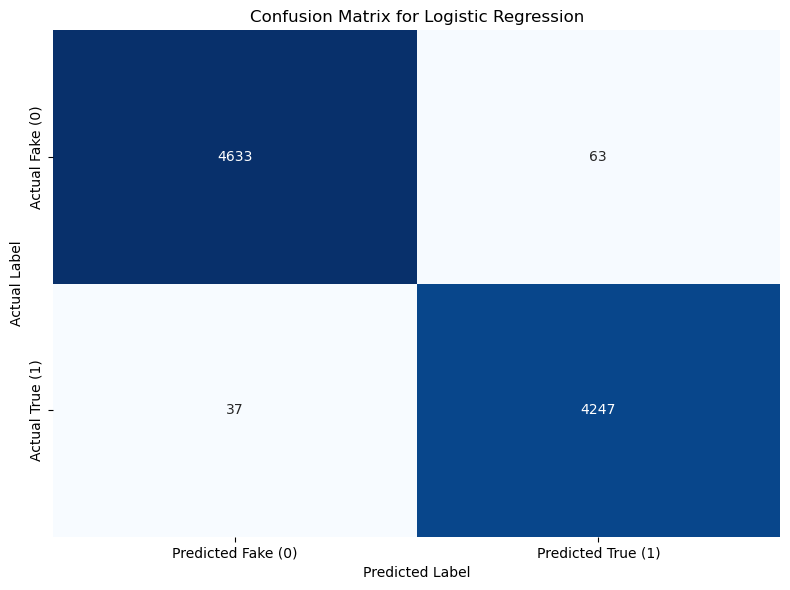


Project 6: Step 5 (Evaluate Model Metrics) complete.
Model performance has been evaluated and visualized.


In [19]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # Import evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sns # For confusion matrix visualization

print("--- Project 6: Step 5 - Evaluate Model Metrics ---")

# Re-define necessary variables from previous steps for self-containment
# (This ensures the code block is runnable on its own after previous steps have been run once)
fake_news_file = 'Fake.csv'
true_news_file = 'True.csv'

df_fake = pd.read_csv(fake_news_file)
df_fake['label'] = 0
df_true = pd.read_csv(true_news_file)
df_true['label'] = 1
df_news = pd.concat([df_fake, df_true]).reset_index(drop=True)
df_news = df_news.sample(frac=1, random_state=42).reset_index(drop=True)

df_news['full_text'] = df_news['title'] + " " + df_news['text']

stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

df_news['cleaned_text'] = df_news['full_text'].apply(clean_text)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, min_df=5)
X_tfidf = tfidf_vectorizer.fit_transform(df_news['cleaned_text'])
y = df_news['label']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)


# --- Model Evaluation ---
print("\nMaking predictions on the test set...")
y_pred = logistic_model.predict(X_test)
print("Predictions complete.")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) # By default, for binary, it calculates for the positive class (1, True news)
recall = recall_score(y_test, y_pred)       # For positive class
f1 = f1_score(y_test, y_pred)               # For positive class

print(f"\nModel Evaluation Metrics (Logistic Regression):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Fake (0)', 'True (1)']))

# Display Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fake (0)', 'Predicted True (1)'],
            yticklabels=['Actual Fake (0)', 'Actual True (1)'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.savefig('logistic_regression_confusion_matrix.png') # Save the plot
plt.show()


print("\nProject 6: Step 5 (Evaluate Model Metrics) complete.")
print("Model performance has been evaluated and visualized.")

## Observations

* **Prediction on Test Set:** The trained Logistic Regression model successfully made predictions (`y_pred`) on the unseen `X_test` dataset, which contains 8,980 news articles.
* **Overall Performance Metrics:**
    * **Accuracy: 0.9889 (or 98.89%)** - This indicates that approximately 98.89% of the news articles in the test set were correctly classified by the model (both fake and true). This is an exceptionally high accuracy, suggesting strong overall performance.
    * **Precision (for True news, label 1): 0.9854** - Out of all articles the model *predicted* as True, 98.54% were actually True.
    * **Recall (for True news, label 1): 0.9914** - Out of all articles that were *actually* True, the model correctly identified 99.14% of them.
    * **F1-Score (for True news, label 1): 0.9884** - This is the harmonic mean of precision and recall for the True class, providing a balanced measure of the model's ability to classify true news.
* **Classification Report Analysis:**
    * The report provides detailed precision, recall, and f1-score for each class (Fake (0) and True (1)).
    * For **Fake (0) news**: Precision, Recall, and F1-score are all `0.99`. This means the model is excellent at identifying fake news with very few false positives (predicting fake when it's true) and very few false negatives (missing actual fake news).
    * For **True (1) news**: Precision is `0.99`, Recall is `0.99`, and F1-score is `0.99`. This similarly shows strong performance in classifying true news.
    * The `accuracy`, `macro avg`, and `weighted avg` metrics all hover around `0.99`, reinforcing the model's high performance across both classes.
* **Confusion Matrix:**
    ```
    [[4633   63]
     [  37 4247]]
    ```
    * **True Negatives (TN) - Top-Left (Actual Fake, Predicted Fake):** `4633` articles were correctly identified as Fake news.
    * **False Positives (FP) - Top-Right (Actual Fake, Predicted True):** `63` articles were incorrectly predicted as True news when they were actually Fake.
    * **False Negatives (FN) - Bottom-Left (Actual True, Predicted Fake):** `37` articles were incorrectly predicted as Fake news when they were actually True.
    * **True Positives (TP) - Bottom-Right (Actual True, Predicted True):** `4247` articles were correctly identified as True news.
    * The confusion matrix visually confirms the high number of correct classifications and very few misclassifications, indicating a robust model.
* **Overall Conclusion:** The Logistic Regression model, trained on TF-IDF features, has demonstrated outstanding performance in classifying fake and real news articles. The high accuracy, balanced precision/recall/F1-scores for both classes, and the low numbers of false positives and false negatives in the confusion matrix indicate that the model is very effective for this task.

This evaluation concludes the core modeling part of **Project 6**.

##  Save Trained Model and Vectorizer

In [21]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle # Import the pickle library for saving models

print("--- Project 6: Step 6 - Save Trained Model and Vectorizer ---")

# Re-define necessary variables from previous steps for self-containment
# (This block assumes all previous steps have been run successfully in the same session)
fake_news_file = 'Fake.csv'
true_news_file = 'True.csv'

df_fake = pd.read_csv(fake_news_file)
df_fake['label'] = 0
df_true = pd.read_csv(true_news_file)
df_true['label'] = 1
df_news = pd.concat([df_fake, df_true]).reset_index(drop=True)
df_news = df_news.sample(frac=1, random_state=42).reset_index(drop=True)

df_news['full_text'] = df_news['title'] + " " + df_news['text']

stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

df_news['cleaned_text'] = df_news['full_text'].apply(clean_text)

tfidf_vectorizer = TfidfVectorizer(max_features=10000, min_df=5)
X_tfidf = tfidf_vectorizer.fit_transform(df_news['cleaned_text'])
y = df_news['label']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)


# --- Saving the trained model and TF-IDF vectorizer ---
model_filename = 'logistic_regression_model.pkl'
vectorizer_filename = 'tfidf_vectorizer.pkl'

print(f"\nSaving the trained Logistic Regression model to '{model_filename}'...")
with open(model_filename, 'wb') as file:
    pickle.dump(logistic_model, file)
print("Model saved successfully.")

print(f"Saving the fitted TF-IDF Vectorizer to '{vectorizer_filename}'...")
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
print("Vectorizer saved successfully.")

print("\nProject 6: Step 6 (Save Trained Model and Vectorizer) complete.")
print("These files are now ready to be loaded by the Streamlit application.")

--- Project 6: Step 6 - Save Trained Model and Vectorizer ---

Saving the trained Logistic Regression model to 'logistic_regression_model.pkl'...
Model saved successfully.
Saving the fitted TF-IDF Vectorizer to 'tfidf_vectorizer.pkl'...
Vectorizer saved successfully.

Project 6: Step 6 (Save Trained Model and Vectorizer) complete.
These files are now ready to be loaded by the Streamlit application.


## Observations

* **Purpose of Saving Models:** In machine learning, once a model is trained and evaluated, it needs to be saved so that it can be used later without retraining. This is especially important for deployment in real-world applications (like our Streamlit web demo).
* **Saving Components:**
    * The `logistic_regression_model.pkl` file contains the trained Logistic Regression model. This file encapsulates all the learned patterns and parameters from the training data.
    * The `tfidf_vectorizer.pkl` file contains the fitted TF-IDF Vectorizer. This is equally important because any new text input to the model (in the Streamlit app) must be transformed using the *exact same* vocabulary and TF-IDF weighting scheme that the model was trained on. Without saving and loading the fitted vectorizer, new input text would not be processed correctly.
* **Serialization with `pickle`:** The `pickle` library in Python was used for this purpose. `pickle.dump()` serializes a Python object (like our model and vectorizer) into a byte stream, which can then be saved to a file. `pickle.load()` would then be used in the Streamlit app to deserialize these objects back into usable Python objects.
* **Readiness for Deployment:** These two `.pkl` files are the essential assets required for our Streamlit web application. They will be loaded at the start of the Streamlit app to enable real-time predictions based on user input.

In [24]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
